# Credit Card Fraud Detection on Imbalanced Data Using Machine Learning

**Introduction**

Credit card fraud detection is a crucial application of machine learning in financial systems. However, fraud cases are rare, making the dataset highly imbalanced, which poses challenges for predictive modeling. This notebook demonstrates how to effectively address these challenges using machine learning techniques.

**Objectives:**

Detect fraudulent transactions from credit card data.

Handle the issue of data imbalance.

Compare model performance and select the best approach.

**Dataset Overview**

The dataset used for this project contains transactions made by credit cards. It includes a highly imbalanced set of observations, where fraudulent transactions are a small fraction of the total.

**Features:**

V1-V28: Principal components obtained via PCA.

Amount: Transaction amount.

Time: Time elapsed from the first transaction.

Class: Fraud status (0 for non-fraud, 1 for fraud).

**Exploratory Data Analysis (EDA)**

To understand the data distribution and identify potential issues:

Plot the distribution of features.

Visualize the imbalance in the Class variable.

Investigate correlations between features.

**Handling Imbalanced Data**

Given the highly imbalanced nature of the dataset, special techniques are applied:

**Resampling:**

Oversampling: Synthetic Minority Oversampling Technique (SMOTE).

Undersampling: Random undersampling.

**Evaluation Metrics:**

Accuracy may not be suitable for imbalanced data. We use: Precision, Recall, F1-score, and ROC-AUC.

**Modeling and Evaluation**

We apply and evaluate several machine learning models:

***Logistic Regression***

***Decision Tree***

***Random Forest***

For each model: Train on the imbalanced dataset and again on resampled dataset. Evaluate performance using confusion matrices. Compare results based on evaluation metrics.

**Save the Trained Models**

After training and evaluating the machine learning models, it is crucial to save them for future use. This allows you to avoid retraining the models every time you need to make predictions and facilitates easy deployment.

In this step, we will save the trained models using Python's joblib library. This will enable us to load and use the models later without needing to retrain them.

We will save the model for RandomForestClassifier

## Let’s proceed with coding...

# Import Required Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix
import joblib
from joblib import dump, load
import warnings
import os
import re
warnings.filterwarnings("ignore")

# Loading The Dataset

The dataset we're going to use can be downloaded from Kaggle. It contains data about credit card transactions that occurred during a period of two days, with 492 frauds out of 284,807 transactions.

All variables in the dataset are numerical. The data has been transformed using PCA transformation(s) due to privacy reasons. The two features that haven't been changed are Time and Amount. Time contains the seconds elapsed between each transaction and the first transaction in the dataset.

In [7]:
df = pd.read_csv("creditcard.csv")

# Data Exploration

In [9]:
# Display first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# Display all columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
# Display Dataset Shape
df.shape

(284807, 31)

In [12]:
print("Number Of Columns :",df.shape[1])
print("Nmber Of Rows :",df.shape[0])

Number Of Columns : 31
Nmber Of Rows : 284807


In [13]:
# Display Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
# Summary Statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Visualize Class Imbalance
Use seaborn to visualize the distribution of the target variable to understand class imbalance.

In [16]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [17]:
image_folder=R"C:\Users\admin\Desktop\Capstone project\visual"

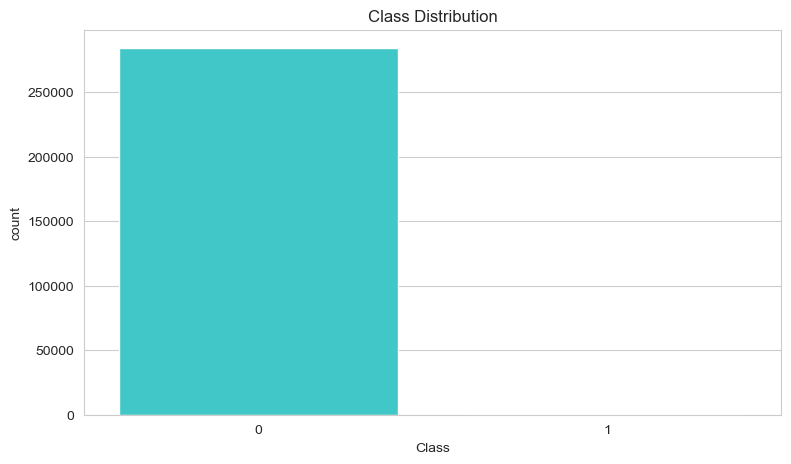

In [18]:
# Set up the visualization style
sns.set_style("whitegrid")

# Visualize the distribution of the target variable
plt.figure(figsize=(9,5))
sns.countplot(data=df,x="Class",palette="rainbow")
plt.title("Class Distribution")
plt.savefig(os.path.join(image_folder, "distribution of the target variable.png"))
plt.show()

# Data Preprocessing

Check for missing or null values, Handle duplicates, Scale the features (Amount, Time), Split features and target.

In [21]:
# Check For Missing Values
print("Null Values :",df.isnull().sum().sum())

Null Values : 0


In [22]:
# Check For Duplicate rows
print("Duplicated Rows :",df.duplicated().sum())

Duplicated Rows : 1081


In [23]:
# Drop Duplicate Rows
df.drop_duplicates(inplace=True)

In [24]:
# After Removing Duplicated Rows Check Again Dataset Shape
df.shape

(283726, 31)

In [25]:
print("Number Of Columns :",df.shape[1])
print("Nmber Of Rows :",df.shape[0])

Number Of Columns : 31
Nmber Of Rows : 283726


In [26]:
# Standardize "Amount" and "Time"
scaler = StandardScaler()
df[["Time","Amount"]] = scaler.fit_transform(df[["Amount","Time"]])

In [27]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.244200,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,-1.996823,0
1,-0.342584,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-1.996823,0
2,1.158900,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-1.996802,0
3,0.139886,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,-1.996802,0
4,-0.073813,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-1.996781,0


In [28]:
# Split Feature And Target
X = df.drop("Class",axis=1)
y = df["Class"]

# Investigate Correlations Between Features


Correlation analysis helps to understand how features in the dataset relate to each other. High correlation between features might indicate redundancy, while low correlation can suggest that features capture different aspects of the data.

Let's calculate and visualize the correlation matrix.

In [31]:
corr_matrix = df.corr()
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.230105,-0.533428,-0.212410,0.099514,-0.387685,0.216389,0.400408,-0.104662,-0.044123,...,0.108058,-0.064965,-0.112833,0.005055,-0.047596,-0.003425,0.027922,0.010143,-0.010559,0.005777
V1,-0.230105,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,0.117927,-0.094486
V2,-0.533428,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.010556,0.084624
V3,-0.212410,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.422054,-0.182322
V4,0.099514,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,-0.105845,0.129326
V5,-0.387685,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,0.173223,-0.087812
V6,0.216389,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,-0.063279,-0.043915
V7,0.400408,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.085335,-0.172347
V8,-0.104662,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.038203,0.033068
V9,-0.044123,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.007861,-0.094021


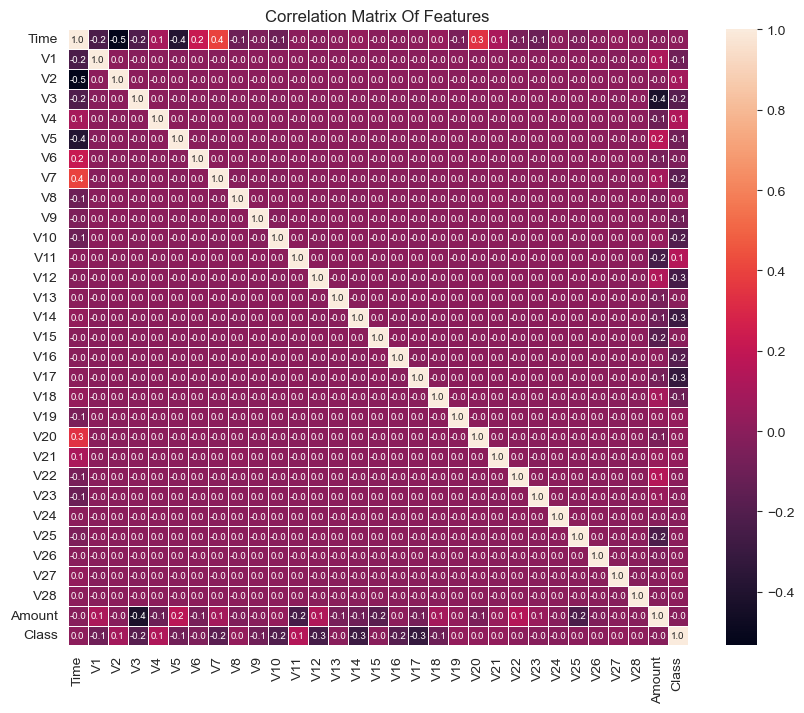

In [32]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_matrix,annot=True,fmt=".1f",linewidths=0.5,annot_kws={"size":7})
plt.title("Correlation Matrix Of Features")
plt.savefig(os.path.join(image_folder, "distribution of the target variable.png"))
plt.show()

In [33]:
# Splitting The Data Into Training And Test Sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [34]:
# Check the Shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (212794, 30)
X_test shape: (70932, 30)
y_train shape: (212794,)
y_test shape: (70932,)


# Logistic Regression Model

In [36]:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression(random_state=42)
# Train The Model
model_1.fit(X_train,y_train)
# Test The Model
y_pred_1 = model_1.predict(X_test)

================= Logistic Regression =================
Accuracy: 0.9991682174476963
Confusion Matrix:
[[70811     9]
 [   50    62]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.87      0.55      0.68       112

    accuracy                           1.00     70932
   macro avg       0.94      0.78      0.84     70932
weighted avg       1.00      1.00      1.00     70932

ROC-AUC SCORE (Imbalanced Data): 0.7767221729132207


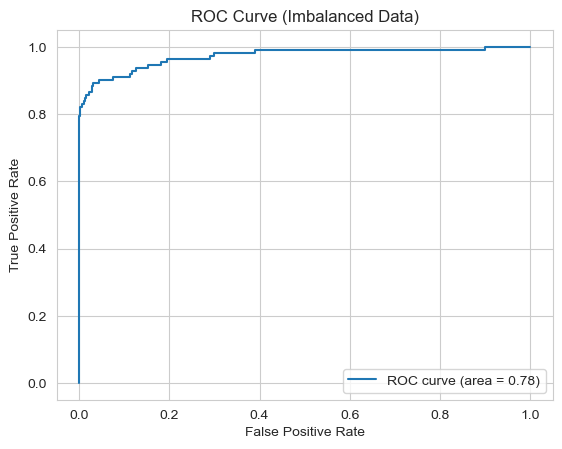

In [37]:
print("================= Logistic Regression =================")

# Accuracy
accuracy_1 = accuracy_score(y_test, y_pred_1)

# Confusion Matrix
confusion_matrix_1 = confusion_matrix(y_test, y_pred_1)

# Classification Report
classification_1 = classification_report(y_test, y_pred_1)

# ROC-AUC Score (renamed to avoid conflict)
roc_auc_value_1 = roc_auc_score(y_test, y_pred_1)

print(f"Accuracy: {accuracy_1}")
print(f"Confusion Matrix:\n{confusion_matrix_1}\n")
print("Classification Report:\n", classification_1)
print("ROC-AUC SCORE (Imbalanced Data):", roc_auc_value_1)

# Plot ROC Curve (using probabilities for the positive class)
fpr, tpr, threshold = roc_curve(y_test, model_1.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_value_1:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Imbalanced Data)')
plt.legend(loc='best')
plt.show()

print("\n")


# Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
# Creating the model
model_2 = DecisionTreeClassifier(random_state=42)
# Train The Model
model_2.fit(X_train,y_train)
# Test The Model
y_pred_2 = model_2.predict(X_test)

================= Decision Tree Classifier =================
Accuracy: 0.9991541194383353
Confusion Matrix:
[[70788    32]
 [   28    84]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.72      0.75      0.74       112

    accuracy                           1.00     70932
   macro avg       0.86      0.87      0.87     70932
weighted avg       1.00      1.00      1.00     70932

ROC-AUC SCORE (Imbalanced Data): 0.8747740751200226


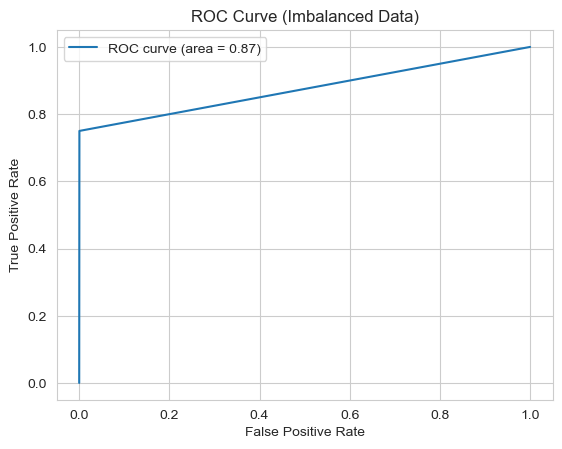

In [40]:
print("================= Decision Tree Classifier =================")

# Accuracy
accuracy_2 = accuracy_score(y_test, y_pred_2)

# Confusion Matrix
confusion_matrix_2 = confusion_matrix(y_test, y_pred_2)

# Classification Report
classification_2 = classification_report(y_test, y_pred_2)

# ROC-AUC Score (renamed to avoid conflict)
roc_auc_value_2 = roc_auc_score(y_test, y_pred_2)

print(f"Accuracy: {accuracy_2}")
print(f"Confusion Matrix:\n{confusion_matrix_2}\n")
print("Classification Report:\n", classification_2)
print("ROC-AUC SCORE (Imbalanced Data):", roc_auc_value_2)

# Plot ROC Curve (using probabilities for the positive class)
fpr, tpr, threshold = roc_curve(y_test, model_2.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_value_2:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Imbalanced Data)')
plt.legend(loc='best')
plt.show()

print("\n")


# Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
# Creating the model
model_3 = RandomForestClassifier(random_state=42,n_estimators=100,n_jobs=-1,max_depth=10)
# Train The Model
model_3.fit(X_train,y_train)
# Test The Model
y_pred_3 = model_3.predict(X_test)


================= Random Forest Classifier =================
Accuracy: 0.9995065696723623
Confusion Matrix:
[[70816     4]
 [   31    81]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.95      0.72      0.82       112

    accuracy                           1.00     70932
   macro avg       0.98      0.86      0.91     70932
weighted avg       1.00      1.00      1.00     70932

ROC-AUC SCORE (Imbalanced Data): 0.8615789022471456


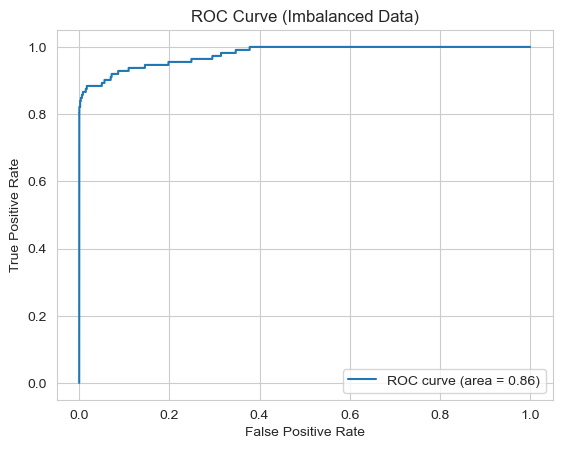

In [43]:
print("================= Random Forest Classifier =================")

# Accuracy
accuracy_3 = accuracy_score(y_test, y_pred_3)

# Confusion Matrix
confusion_matrix_3 = confusion_matrix(y_test, y_pred_3)

# Classification Report
classification_3 = classification_report(y_test, y_pred_3)

# ROC-AUC Score (renamed to avoid conflict)
roc_auc_value_3 = roc_auc_score(y_test, y_pred_3)

print(f"Accuracy: {accuracy_3}")
print(f"Confusion Matrix:\n{confusion_matrix_3}\n")
print("Classification Report:\n", classification_3)
print("ROC-AUC SCORE (Imbalanced Data):", roc_auc_value_3)

# Plot ROC Curve (using probabilities for the positive class)
fpr, tpr, threshold = roc_curve(y_test, model_3.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_value_3:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Imbalanced Data)')
plt.legend(loc='best')
plt.show()

print("\n")


# Handling Imbalanced Data

**There Are Two Techniques:**


**UnderSampling**

**OverSampling**

## Using UnderSampling

In [48]:
# Seperate Normal And Fraud Detection
normal = df[df["Class"]==0]
fraud = df[df["Class"]==1]

# Print shape For refrence
print(f"Normal transaction shape: {normal.shape}")
print(f"Fraud transaction shape: {fraud.shape}")

Normal transaction shape: (283253, 31)
Fraud transaction shape: (473, 31)


In [49]:
# Undersample normal transactions
normal_sample = normal.sample(n=fraud.shape[0])

In [50]:
# Print shape of new normal transactions
print(f"New Normal transaction shape: {normal_sample.shape}")

New Normal transaction shape: (473, 31)


In [51]:
new_df = pd.concat([normal_sample, fraud],ignore_index=True)

In [52]:
# print few row of new data
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.237734,-1.139599,-1.098471,-3.646974,-1.080566,3.777778,2.820625,1.665758,-0.733938,-0.351622,...,1.069942,1.231086,0.093625,0.839483,-1.082271,0.412974,0.771876,-0.017000,0.360480,0
1,-0.293422,2.272208,-1.293724,-0.979224,-1.663991,-1.036083,-0.483359,-1.034060,-0.180272,-1.630648,...,-0.120826,0.207151,0.171019,-0.383899,-0.134475,-0.158318,0.014636,-0.063154,1.395252,0
2,-0.049811,-0.047920,0.345480,0.839086,0.480765,0.234637,0.631264,0.593424,0.310426,0.265178,...,-0.365795,-1.034184,0.397871,0.594562,-0.545951,-1.229649,0.063642,0.023018,1.353151,0
3,-0.153646,-0.378772,0.295026,-0.078342,-0.884613,1.261348,3.968521,-0.951072,1.484878,-0.000051,...,0.244902,0.555110,0.122522,1.096781,-0.903128,1.105968,0.040569,0.133739,-0.489798,0
4,-0.061792,1.100564,-0.438875,0.225382,0.281305,-0.077190,0.999797,-0.541312,0.327954,0.528824,...,0.113194,0.330825,-0.295150,-1.241760,0.493863,0.696020,-0.014891,0.000423,-0.487144,0


In [53]:
# Check new class distribution
new_df["Class"].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [54]:
# Split new df into X and y
X = new_df.drop("Class",axis=1)
y = new_df["Class"]

In [55]:
# Train test split on undersampled data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Train Model with undersample data from sklearn.

## Logistic Regression Model

In [58]:
# Creating the model
model_1 = LogisticRegression(random_state=42)
# Train The Model
model_1.fit(X_train,y_train)
# Test The Model
y_pred_1 = model_1.predict(X_test)

================= Logistic Regression =================
Accuracy: 0.9240506329113924
Confusion Matrix:
[[107   8]
 [ 10 112]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       115
           1       0.93      0.92      0.93       122

    accuracy                           0.92       237
   macro avg       0.92      0.92      0.92       237
weighted avg       0.92      0.92      0.92       237

ROC-AUC SCORE (Imbalanced Data): 0.9242337847469708


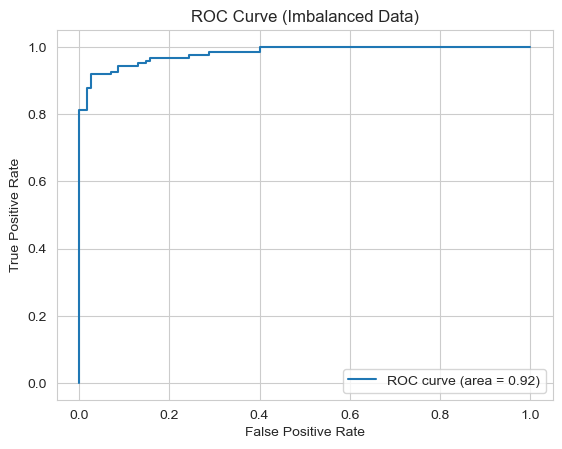

In [59]:
print("================= Logistic Regression =================")

# Accuracy
accuracy_1 = accuracy_score(y_test, y_pred_1)

# Confusion Matrix
confusion_matrix_1 = confusion_matrix(y_test, y_pred_1)

# Classification Report
classification_1 = classification_report(y_test, y_pred_1)

# ROC-AUC Score (renamed to avoid conflict)
roc_auc_value_1 = roc_auc_score(y_test, y_pred_1)

print(f"Accuracy: {accuracy_1}")
print(f"Confusion Matrix:\n{confusion_matrix_1}\n")
print("Classification Report:\n", classification_1)
print("ROC-AUC SCORE (Imbalanced Data):", roc_auc_value_1)

# Plot ROC Curve (using probabilities for the positive class)
fpr, tpr, threshold = roc_curve(y_test, model_1.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_value_1:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Imbalanced Data)')
plt.legend(loc='best')
plt.show()

print("\n")


## Decision Tree Classifier

In [61]:
# Creating the model
model_2 = DecisionTreeClassifier(random_state=42)
# Train The Model
model_2.fit(X_train,y_train)
# Test The Model
y_pred_2 = model_2.predict(X_test)

================= Decision Tree Classifier =================
Accuracy: 0.8987341772151899
Confusion Matrix:
[[101  14]
 [ 10 112]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       115
           1       0.89      0.92      0.90       122

    accuracy                           0.90       237
   macro avg       0.90      0.90      0.90       237
weighted avg       0.90      0.90      0.90       237

ROC-AUC SCORE (Imbalanced Data): 0.8981468282252317


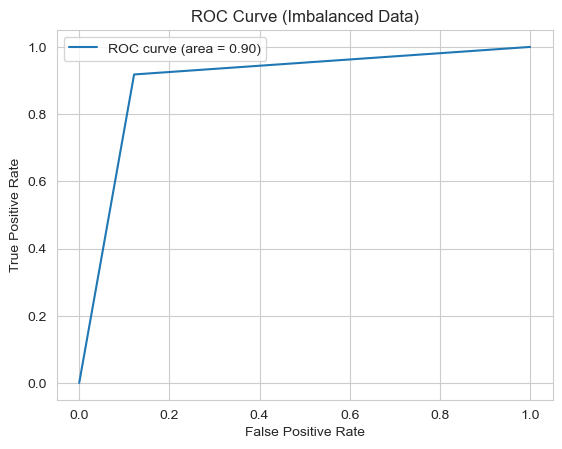

In [62]:
print("================= Decision Tree Classifier =================")

# Accuracy
accuracy_2 = accuracy_score(y_test, y_pred_2)

# Confusion Matrix
confusion_matrix_2 = confusion_matrix(y_test, y_pred_2)

# Classification Report
classification_2 = classification_report(y_test, y_pred_2)

# ROC-AUC Score (renamed to avoid conflict)
roc_auc_value_2 = roc_auc_score(y_test, y_pred_2)

print(f"Accuracy: {accuracy_2}")
print(f"Confusion Matrix:\n{confusion_matrix_2}\n")
print("Classification Report:\n", classification_2)
print("ROC-AUC SCORE (Imbalanced Data):", roc_auc_value_2)

# Plot ROC Curve (using probabilities for the positive class)
fpr, tpr, threshold = roc_curve(y_test, model_2.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_value_2:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Imbalanced Data)')
plt.legend(loc='best')
plt.show()

print("\n")


## Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
# Creating the model
model_3 = RandomForestClassifier(random_state=42)
# Train The Model
model_3.fit(X_train,y_train)
# Test The Model
y_pred_3 = model_3.predict(X_test)

================= Random Forest Classifier =================
Accuracy: 0.9451476793248945
Confusion Matrix:
[[112   3]
 [ 10 112]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       115
           1       0.97      0.92      0.95       122

    accuracy                           0.95       237
   macro avg       0.95      0.95      0.95       237
weighted avg       0.95      0.95      0.95       237

ROC-AUC SCORE (Imbalanced Data): 0.9459729151817535


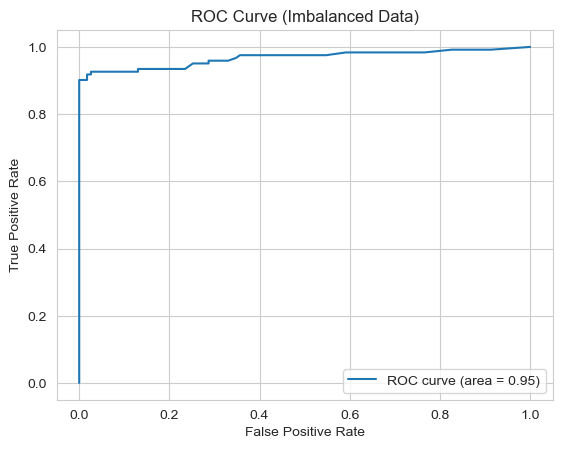

In [65]:
print("================= Random Forest Classifier =================")

# Accuracy
accuracy_3 = accuracy_score(y_test, y_pred_3)

# Confusion Matrix
confusion_matrix_3 = confusion_matrix(y_test, y_pred_3)

# Classification Report
classification_3 = classification_report(y_test, y_pred_3)

# ROC-AUC Score (renamed to avoid conflict)
roc_auc_value_3 = roc_auc_score(y_test, y_pred_3)

print(f"Accuracy: {accuracy_3}")
print(f"Confusion Matrix:\n{confusion_matrix_3}\n")
print("Classification Report:\n", classification_3)
print("ROC-AUC SCORE (Imbalanced Data):", roc_auc_value_3)

# Plot ROC Curve (using probabilities for the positive class)
fpr, tpr, threshold = roc_curve(y_test, model_3.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_value_3:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Imbalanced Data)')
plt.legend(loc='best')
plt.show()

print("\n")


## Saved The Trained Model (Logistic Regression)

In [67]:
# Pick a model, e.g. Logistic Regression
# Fit the model with X_train, y_train
model_1 = LogisticRegression(random_state=42)
model_1.fit(X_train,y_train)

LogisticRegression(random_state=42)

**In a Jupyter environment, please rerurn this cell to show the HTML representation or trust the notebook**

**On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [70]:
# Save the model
joblib.dump(model_1,"credit_card_model.pkl")

['credit_card_model.pkl']

In [71]:
# Load the model
model = joblib.load("credit_card_model.pkl")

In [72]:
# Predict with a sample data
pred = model_1.predict([[-1.2063166480452974,-0.653464067093327,1.15579454161356,1.4398458100309,-0.0483979577939286,-0.257954764175468,-0.763320426103366,0.339229688923037,-0.768705965846787,-0.115541693321453,-0.20021646873148,-0.650926246487322,-0.735778340137806,-1.3940656101548,0.447721760826057,0.98477163074674,0.271223077633162,-0.251055900420813,-0.165413052650476,0.0091942158033362,-0.160498072645411,0.518041029678345,-0.970619090556498,0.104889604203672,0.307935462300307,-0.222502578722938,0.0825004649897294,0.291624326333603,0.125488524044667,-0.3442213776454372]])

# Print the prediction
if pred == 0:
    print("Normal Transaction")
else:
    print("Fraud Transaction")

Normal Transaction


## Conclusion

In this analysis, we performed a comprehensive exploration and modeling process for credit card fraud detection using an imbalanced dataset. The steps included:

**Data Exploration and Preprocessing:**

We began by loading and exploring the dataset, visualizing class imbalance, and performing necessary preprocessing steps.


**Correlation Analysis:**

By investigating the correlations between features, we gained insights into how features interact with each other. This helped in identifying potential redundancies and understanding feature relationships.

**Handling Imbalanced Data:**

We applied techniques such as undersampling and oversampling to address the class imbalance. This was crucial in ensuring that our models could better learn from the minority class.

**Model Training and Evaluation:**

We trained and evaluated various classifiers, including Logistic Regression, Decision Tree, and RandomForest. We assessed model performance using metrics such as confusion matrices, classification reports, ROC-AUC scores, and ROC curves.

**Model Saving:**

The trained models were saved for future use, ensuring that we can easily load and apply them for predictions on new data.

**Key Findings:**

***Feature Correlations:***

Our correlation analysis revealed important relationships between features. This understanding can guide feature selection and engineering in future analyses.

**Model Performance:**

The Logistic Regression Model demonstrated high accuracy in detecting fraud, showing that it is a strong candidate for deployment. The ROC-AUC scores and ROC curves provided insights into each model’s performance, particularly in distinguishing between fraudulent and non-fraudulent transactions.

**Impact of Imbalance Handling:**

Techniques for balancing the dataset were essential in improving model performance and ensuring that the minority class (fraudulent transactions) was adequately represented in the training process.

Overall, this analysis has provided a robust framework for credit card fraud detection. The insights gained from feature correlations and model evaluations will be instrumental in refining our approach and improving detection capabilities. Future work could involve fine-tuning models further, experimenting with additional features, and exploring other advanced techniques for handling imbalanced data.